In [ ]:
#from keras.preprocessing import image
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
fetauresPath='/content/drive/MyDrive/FeaturesEngineering/'
data=pd.read_csv(fetauresPath+'train_Titanic.csv')
data.head()
print(data.shape)

(891, 12)


In [ ]:
import pandas as pd
fetauresPath='/content/drive/MyDrive/FeaturesEngineering/'
data=pd.read_csv(fetauresPath+'train_Titanic.csv')

# Supprimer les colonnes non nécessaire pour la classification
data.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

# Convertir la valeur de la colonne sexe au valeur numériques: male=0 et female=1
data['Sex']=(data['Sex']=='female').astype('Int32')

# Convertir les informations d'embarquement (embarked) aux valeurs numériques
# embarked:  Port of Embarkation (C = Cherbourg = 0; Q = Queenstown =1 ; S = Southampton=2)
embarked=data['Embarked'].unique().tolist()
data['Embarked']=data['Embarked'].apply(lambda x: embarked.index(x))


# Créer les étiquettes (labsls)
y=data.iloc[:,data.columns=='Survived']
y=np.ravel(y)
# Supprimer la colonne de labels des données et les Copier dans X
X=data.drop(['Survived'], axis=1, inplace=False)
# Afficher l'entête de X
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [ ]:
# Vérifiez et afficher les colonnes contenant avec leurs nombres de valeurs manquantes
print(X.isna().sum())

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def classify(dataX, labels):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(dataX, labels, test_size=0.2, random_state=24)
  print("X_train:", np.array(X_train).shape, "X_test:", np.array(X_test).shape)
  model = SVC(kernel='rbf')
  # Lancer l'entrainement
  model.fit(X_train, y_train)
  # Lancer la prédiction de la base de validation
  y_pred = model.predict(X_test)
  # Afficher l'accuracy
  print (accuracy_score(y_test, y_pred))

In [ ]:
# Supprimer les lignes contenant des valeurs manquantes
dataBis=data.dropna(axis=0)

# Créer les étiquettes (labsls)
yBis=dataBis.iloc[:,data.columns=='Survived']
yBis=np.ravel(yBis)
# Supprimer la colonne de labels des données
dataBis.drop(['Survived'], axis=1)
# Copier les données dans X
XBis=dataBis.iloc[:]

classify(XBis, yBis)

X_train: (571, 9) X_test: (143, 9)
0.6923076923076923


In [ ]:
# Supprimer les colonnes contenant des valeurs manquantes
X_dataDropedCols=X.dropna(axis=1)

classify(X_dataDropedCols, y)

X_train: (712, 7) X_test: (179, 7)
0.6871508379888268


In [ ]:
# Imputer avec la moyenne des colonnes
X_meanAge = X.fillna(X.mean())
classify(X_meanAge, y)

X_train: (712, 8) X_test: (179, 8)
0.6983240223463687


In [ ]:
# Imputer avec la médiane des colonnes
X_medAge = X.fillna(X.median())
classify(X_medAge, y)

X_train: (712, 8) X_test: (179, 8)
0.6983240223463687


In [ ]:
# Imputer avec des zéros
X_zerosAge = X.fillna(0)
classify(X_zerosAge, y)

X_train: (712, 8) X_test: (179, 8)
0.6927374301675978


In [ ]:
# Imputer avec la moyenne des colonnes
X.fillna(X.mean(), inplace=True)
classify(X, y)

X_train: (712, 8) X_test: (179, 8)
0.6983240223463687


In [ ]:
# Exemple de suppression des valeurs aberrantes à l'aide de la moyenne et l'écart-type
mean = data['Fare'].mean()
std = data['Fare'].std()
seuil = 4  # Définir un seuil d'écart-type
data_sans_aberrantes = data[(data['Fare'] >= mean - seuil * std)
                            &
                             (data['Fare'] <= mean + seuil * std)]

yBis=data_sans_aberrantes.iloc[:,data.columns=='Survived']
yBis=np.ravel(yBis)
# Supprimer la colonne de labels des données et copier les données
XBis=data_sans_aberrantes.drop(['Survived'], axis=1)
# Remplacer les NA par la moyenne
XBis.fillna(XBis.mean())
print("Nombre de valeur aberrantes pour Fare: ", 891 - data_sans_aberrantes.shape[0])
XBis.fillna(XBis.mean(), inplace=True)

classify(XBis, yBis)

Nombre de valeur aberrantes pour Fare:  11
X_train: (704, 8) X_test: (176, 8)
0.6931818181818182


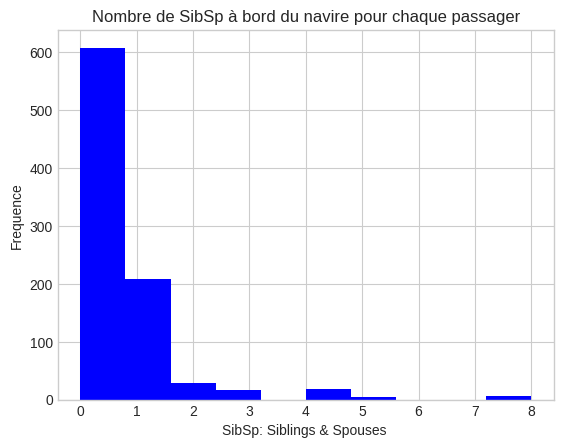

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['SibSp'], color='blue')
plt.xlabel('SibSp: Siblings & Spouses ')
plt.ylabel('Frequence')
plt.title("Nombre de SibSp à bord du navire pour chaque passager")
plt.show()

In [ ]:
data_sans_aberrantes = data[(data['SibSp'] < 4) ]
print("Nombre de valeurs aberrantes pour SibSp: ",data.shape[0] -data_sans_aberrantes.shape[0])
yBis=data_sans_aberrantes.iloc[:,data_sans_aberrantes.columns=='Survived']
yBis=np.ravel(yBis)
# Supprimer la colonne de labels des données et copier les données
XBis=data_sans_aberrantes.drop(['Survived'], axis=1)
# Remplacer les NA par la moyenne
XBis.fillna(XBis.mean())
XBis.fillna(XBis.mean(), inplace=True)

classify(XBis, yBis)

Nombre de valeurs aberrantes pour SibSp:  30
X_train: (688, 8) X_test: (173, 8)
0.7052023121387283


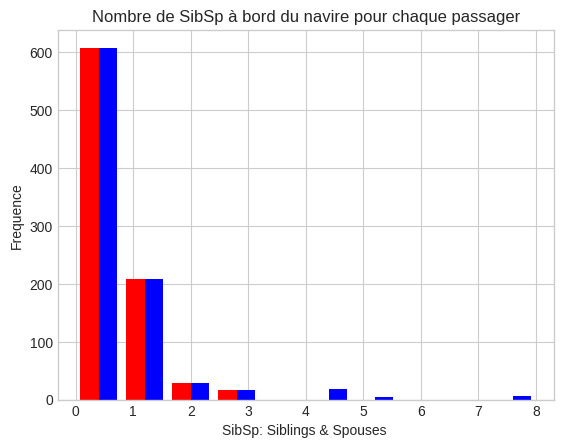

In [ ]:
import matplotlib.pyplot as plt
plt.hist([data_sans_aberrantes['SibSp'], data['SibSp']], color=['red', 'blue'])
plt.xlabel('SibSp: Siblings & Spouses ')
plt.ylabel('Frequence')
plt.title("Nombre de SibSp à bord du navire pour chaque passager")
plt.show()

In [ ]:
# Transformation logarithmique
# Xlog est la matrice de caractéristiques après transformation logarithmique
Xlog=np.log1p(X)
# Classification utilisant les caractéristiques aprés tranformation logarithmique
classify(Xlog,y)

X_train: (712, 8) X_test: (179, 8)
0.8044692737430168


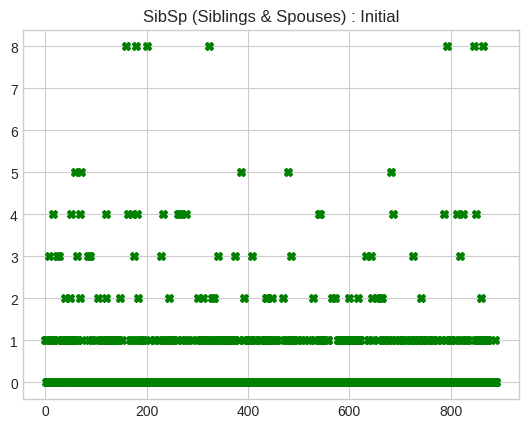

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X['SibSp'], 'X' ,color='green')

plt.title("SibSp (Siblings & Spouses) : Initial")
plt.show()

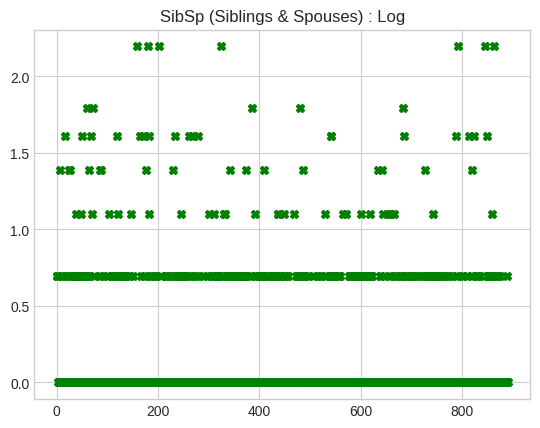

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Xlog['SibSp'], 'X' ,color='green')

plt.title("SibSp (Siblings & Spouses) : Log")
plt.show()

In [ ]:
# # Load features and labels
import pickle
fetauresPath='/content/drive/MyDrive/FeaturesEngineering/'
X = pickle.load( open( fetauresPath+"features_vgg16", "rb" ) )
y =pickle.load( open( fetauresPath+"labels", "rb" ) )

import numpy as np
print(np.array(X).shape, np.array(y).shape)

(490, 1000) (490,)


In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
import time

# Fonction de classification
def classify(X, y):
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialiser le classificateur SVM avec un noyau linéaire
    model = svm.SVC(kernel='linear')

    # Mesurer le temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Prédire les étiquettes de l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer la précision moyenne avec une validation croisée sur l'ensemble d'entraînement
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cross_val_accuracy = scores.mean()

    # Afficher les résultats
    print("Temps d'entraînement:", end_time - start_time, "secondes")
    print("Précision sur l'ensemble de test:", model.score(X_test, y_test))
    print("Précision moyenne (validation croisée):", cross_val_accuracy)


In [ ]:
# Appeler la fonction classify avec vos données X et y
classify(X, y)

Temps d'entraînement: 0.01867198944091797 secondes
Précision sur l'ensemble de test: 0.9489795918367347
Précision moyenne (validation croisée): 0.9770853618954884


In [ ]:
"""Standarization
Standardize features by removing the mean and scaling to unit variance.
z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False
s is the standard deviation of the training samples or one if with_std=False.
"""
# Xzscore est la matrice de caractéristiques après standardisation
Xzscore= (X -X.mean())/X.std()

#print(np.array(Xzscore).shape)
classify(Xzscore,y)

Temps d'entraînement: 0.011764764785766602 secondes
Précision sur l'ensemble de test: 0.9591836734693877
Précision moyenne (validation croisée): 0.982148653034729


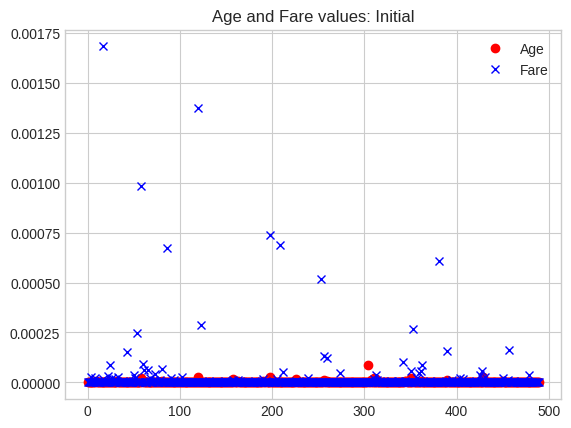

In [ ]:
line1, = plt.plot(X[:, 0], 'o', color='red', label="Age")  # Colonne 0 (Age)
line2, = plt.plot(X[:, 1], 'x', color='blue', label="Fare")  # Colonne 1 (Fare)
plt.title("Age and Fare values: Initial")
plt.legend(handles=[line1, line2])
plt.show()

In [ ]:
# Réduire Xlog aux 490 premiers échantillons
Xlog = Xlog[:490]

# Standardisation après transformation log
XLogZscore = (Xlog - Xlog.mean()) / Xlog.std()  # Standardisation des données après transformation log

# Effectuer la classification avec les données log-transformées et standardisées
classify(XLogZscore, y)


Temps d'entraînement: 0.007732391357421875 secondes
Précision sur l'ensemble de test: 0.9591836734693877
Précision moyenne (validation croisée): 0.9795520934761441


In [ ]:
print(Xlog.shape)  # Afficher la taille de Xlog
print(y.shape)  # Afficher la taille de y

(891, 8)
(490,)


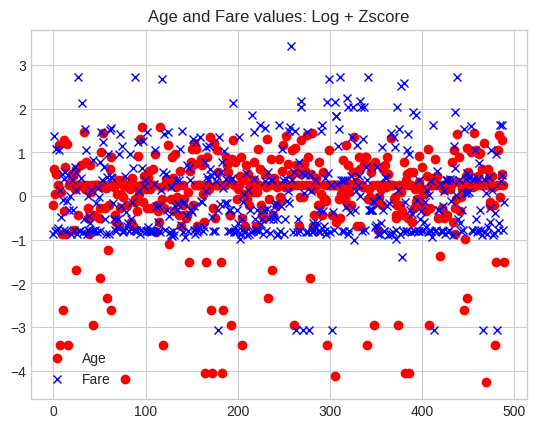

In [ ]:
import matplotlib.pyplot as plt
line1, =plt.plot(XLogZscore['Age'], 'o', color='red', label="Age")
line2, =plt.plot(XLogZscore['Fare'], 'x', color='blue', label="Fare")
plt.title("Age and Fare values: Log + Zscore")
plt.legend(handles=[line1, line2])
plt.show()

In [ ]:
"""Noramlization
Xnorm=(X-Xmin)/(Xmax -Xmin).
"""
# Xminmax est la matrice de caractéristiques après normalisation
Xminmax=(X -X.min())/(X.max() - X.min())

#print(np.array(Xminmax).shape)
classify(Xminmax,y)

Temps d'entraînement: 0.02318739891052246 secondes
Précision sur l'ensemble de test: 0.9489795918367347
Précision moyenne (validation croisée): 0.9770853618954884


In [ ]:
"""Noramlization
Xnorm=(X-Xmin)/(Xmax -Xmin).
"""
# Xminmax est la matrice de caractéristiques après normalisation
XLogMinmax=(Xlog -Xlog.min())/(Xlog.max() - Xlog.min())

#print(np.array(Xminmax).shape)
classify(XLogMinmax,y)

Temps d'entraînement: 0.007684469223022461 secondes
Précision sur l'ensemble de test: 0.7551020408163265
Précision moyenne (validation croisée): 0.8316455696202532
